<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 01-SAT score

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state.

---
This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
reader = csv.DictReader(open('sat_scores.csv'))# Load the file with the csv module and put it in a Python dictionary

data = {}
for row in reader:
   for column, value in row.items():
       data.setdefault(column, []).append(value)
print (data)

{'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4', '45'], 'Verbal': ['509', '499', '511', '495', '520', '501', '500', '511', '506', '510', '501', '508', '493', '491', '499', '486', '482', '526', '498', '527', '493', '485', '514', '498', '523', '509', '539', '534', '539', '527', '543', '562', '551', '576', '550', '547', '561', '580', '577', '559', '562', '567', '577', '564', '584', '562', '575', '593', '577', '592', '566',

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [3]:
data1=pd.DataFrame(data)
data1.dtypes

State     object
Rate      object
Verbal    object
Math      object
dtype: object

In [4]:
data=pd.read_csv('./sat_scores.csv') #Make a pandas DataFrame object

In [5]:
data.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

1.2. What is the difference between loading from file and inputting this dictionary (if any)? 
when you input the data with csv, the data frame return the whole table as an object whereas when you download it through pandas, it gives a right type of each type of the column.
If you do not convert the string column values to float in your dictionary, the columns in the DataFrame are of type object (which are string values, essentially).

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [6]:
data.head(10)#it shows the info about the first 10 rows.Infor about the state, rate,Verbal and Math


,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [7]:
data.columns

Index(['State', 'Rate', 'Verbal', 'Math'], dtype='object')

In [8]:
data=data.round()#Cleaning the data get rid of the decimals
data

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


The data dictionary is made of the type of each Five variables; State, as string, shows the initials for each state of the US while Rate, as an integer variable, shows the rank of each state . Verbal and Math,as integer variables, show the average grades of each state in terms of Verbal and math literacy .Furthermore, Data Shape shows the type of the shapes of the data. 

In [9]:
# A data dictionary as an object that describes my data
data_dictionary ={
    'State':data['State'].dtypes, 
    'Rate':data['Rate'].dtypes,
    'Verbal':data['Verbal'].dtypes,
    'Math':data['Math'].dtypes,
    'Data Shape': data.dtypes,
}
data_dictionary                  

{'State': dtype('O'),
 'Rate': dtype('int64'),
 'Verbal': dtype('int64'),
 'Math': dtype('int64'),
 'Data Shape': State     object
 Rate       int64
 Verbal     int64
 Math       int64
 dtype: object}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

C:\Users\samra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


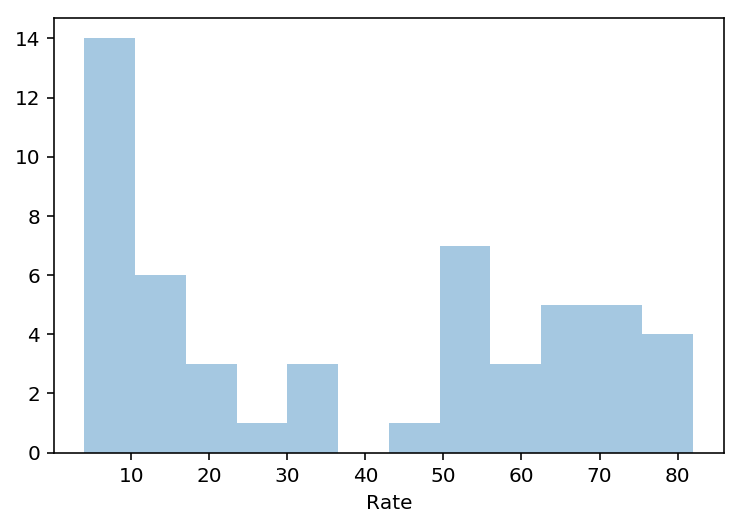

In [10]:
import seaborn as sns

sns.distplot(data['Rate'],bins=12,kde=False) #Using seaborn's distplot, plot the distributions for Rate

C:\Users\samra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


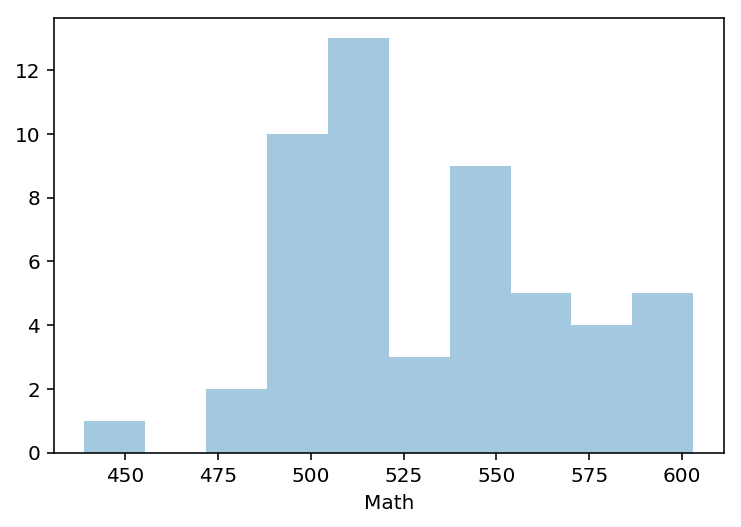

In [11]:
 sns.distplot(data['Math'],kde=False,bins=10) #Using seaborn's distplot, plot the distributions for Math

C:\Users\samra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


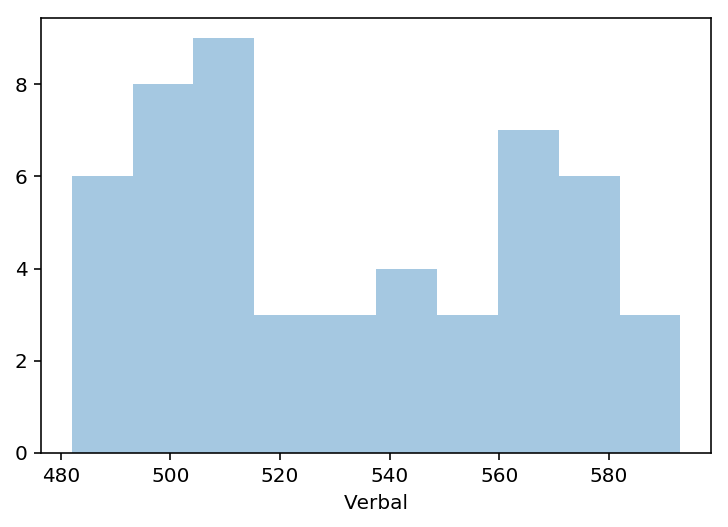

In [12]:
sns.distplot(data['Verbal'],kde=False,bins=10) #Using seaborn's distplot, plot the distributions for Verbal

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

<seaborn.axisgrid.PairGrid object at 0x0000020FF18989E8> <seaborn.axisgrid.PairGrid object at 0x0000020FF190B630> <seaborn.axisgrid.PairGrid object at 0x0000020FF2C05AC8>


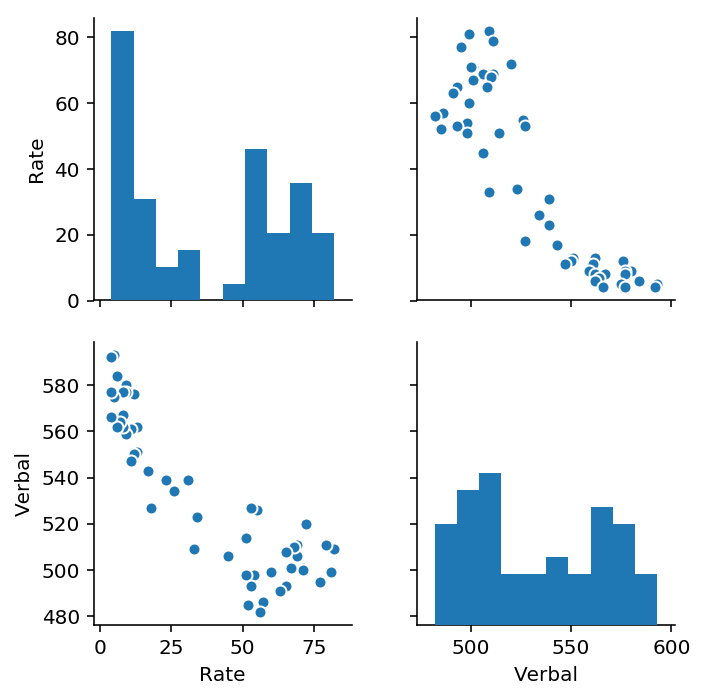

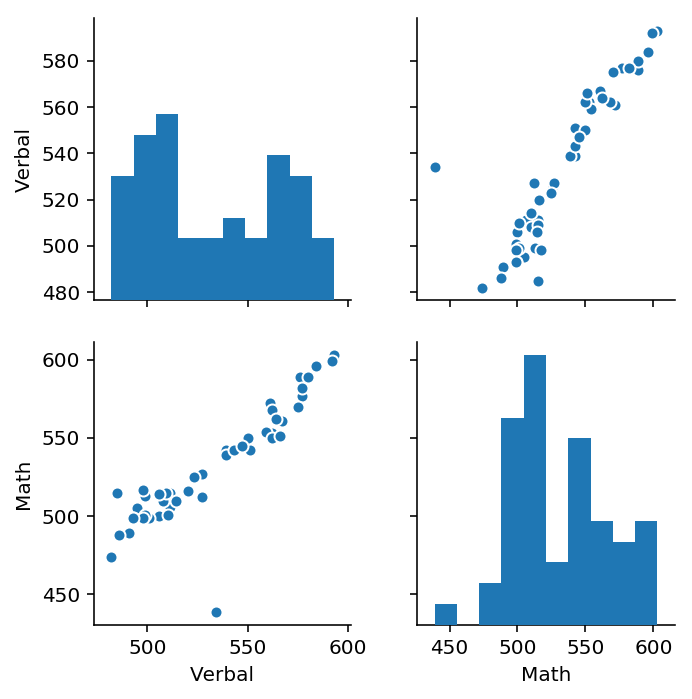

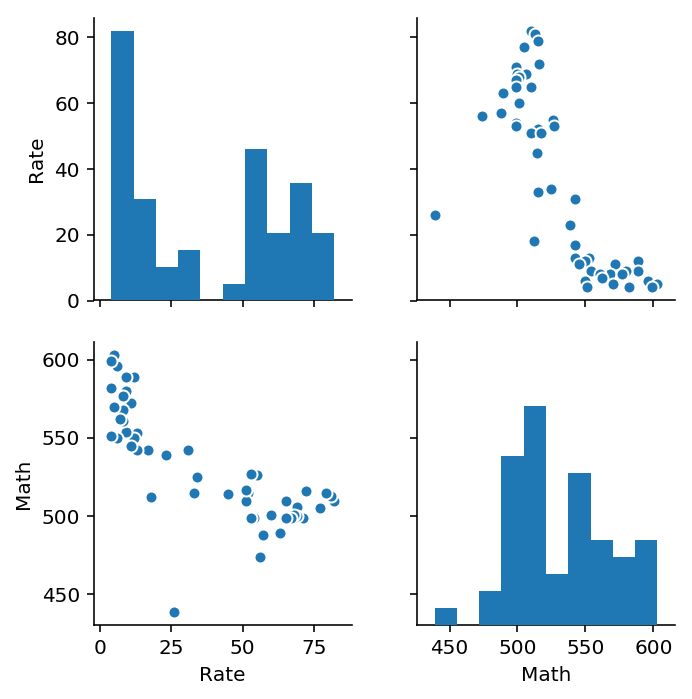

In [13]:
#Using seaborn's pairplot, show the joint distributions for each of Rate, Math, and Verbal
g= sns.pairplot(data, vars=["Rate", "Verbal"])
g1 = sns.pairplot(data, vars=["Verbal", "Math"])
g2=sns.pairplot(data, vars=["Rate", "Math"])
print(g,g1,g2)

The  plots with onley variable  show the distribution of Rate,Verbal and Rate. The other figures show the relationship between each two variables. The second figure shows the neagative relationship between Verbal and Rate. Tos who receive high Rate got low mar for Verbal. Howver, there is a positive and linear relationship between Math and Verbal. It is interesting to see there is a negative relationshop between Math and Rate.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

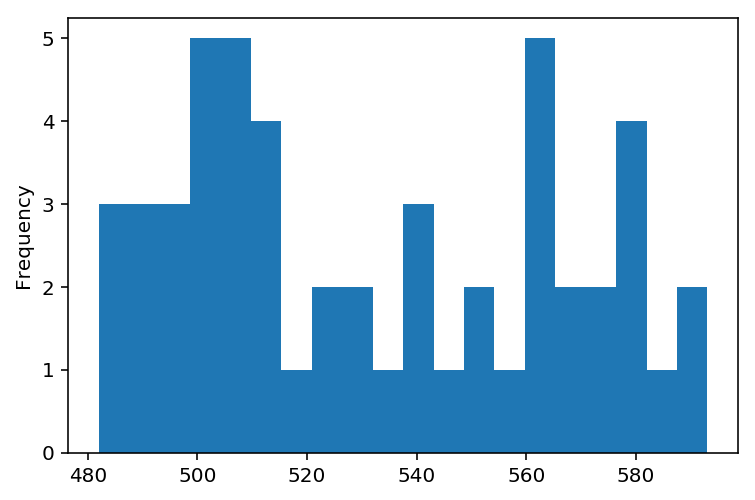

In [14]:
data['Verbal'].plot.hist(stacked=True,bins=20)#Plot a stacked histogram with Verbal

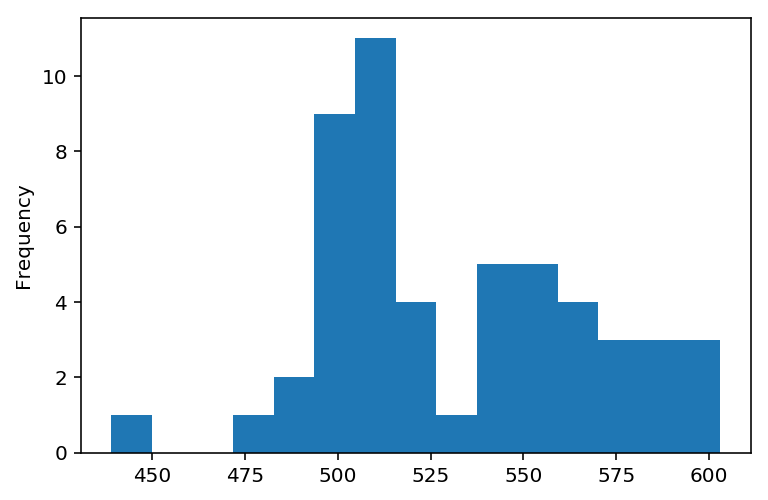

In [15]:
data['Math'].plot.hist(stacked=True,bins=15)#Plot a stacked histogram with Math

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?
    

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

In [16]:
data.describe()


,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


What are the benefits of using a boxplot as compared to a scatterplot or a histogram? 

The box plot (a.k.a. box and whisker diagram) is a standardized way of displaying the distribution of data based on the five number summary: minimum, first quartile, median, third quartile, and maximum.
It is often used in explanatory data analysis. This type of graph is used to show the shape of the distribution, its central value, and its variability. 

What's wrong with plotting a box-plot of Rate on the same chart as Math and Verbal?
The boxplots are hard to visualize together since all of these variables are on different scales.
Boxplot may show the wrong info about the outliers. The maximum and low numbers for Verbal and Math  for Rates are different. 

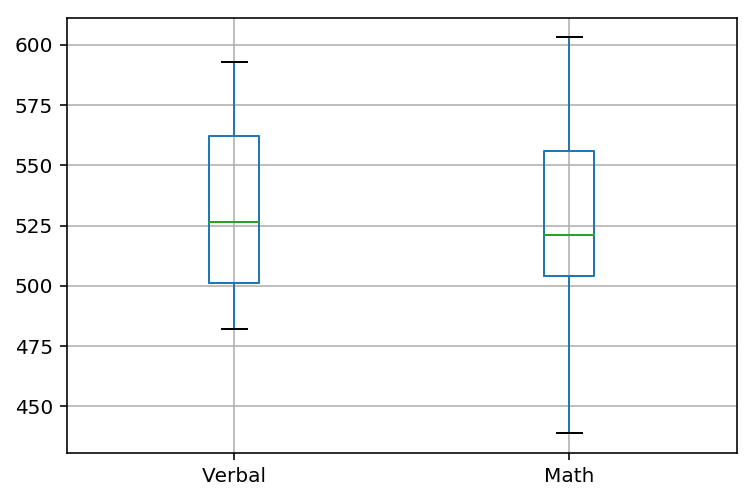

In [17]:
data.boxplot(column=['Verbal','Math'])

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


Think about how you might change the variables so that they would make sense on the same chart.
    Answer: One approach is to sandardize the data with mean 0 and stand deviation of 1. A standardized variable (sometimes will be  rescaled to have a mean of zero and a standard deviation of one. Now, it makes sense to compare columns with different metrics or scale.

In [18]:
data1=data



In [19]:
verb = data1.Verbal.values #To calculate standarizing verbal

verb_mean = np.mean(verb)
verb_std = np.std(verb)
print(verb_mean, verb_std)

532.0192307692307 32.915094961603266


In [20]:
verb_stand = (verb - verb_mean) / verb_std  # verbal being standarized
print(np.mean(verb_stand), np.std(verb_stand))

1.609823385706477e-15 1.0


In [21]:
math1 = data1.Math.values #To calculate standarizing Math

math1_mean = np.mean(math1)
math1_std = np.std(math1)
print(math1_mean, math1_std)

531.5 35.66699616430595


In [22]:
math1_stand = (math1 - math1_mean) / math1_std # Math being standarized
print(np.mean(math1_stand), np.std(math1_stand))

-1.0675221390626506e-18 1.0


In [23]:
rate1 = data1.Rate.values#To calculate standarizing Rate

rate1_mean = np.mean(rate1)
rate1_std = np.std(rate1)
print(rate1_mean, rate1_std)

37.15384615384615 27.037996494523586


In [24]:
rate1_stand = (rate1 - rate1_mean) / rate1_std  # Rate being standarized
print(np.mean(rate1_stand), np.std(rate1_stand))

3.3093186310942166e-17 1.0


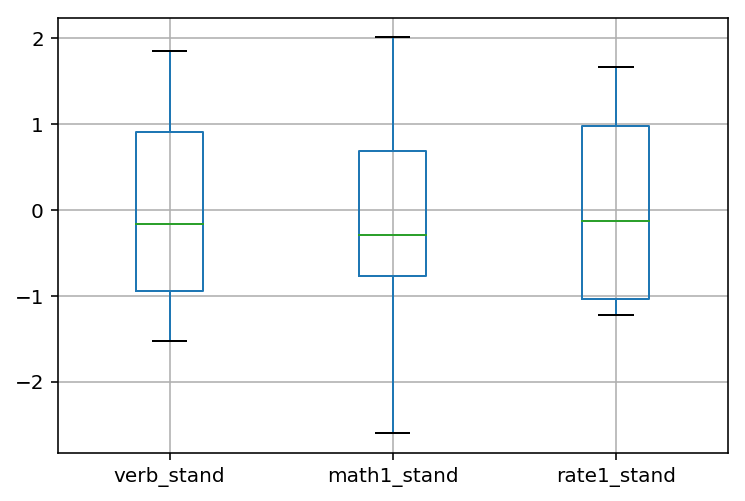

In [25]:
data1['verb_stand']=verb_stand
data1['math1_stand']=math1_stand
data1['rate1_stand']=rate1_stand
data1.boxplot(column=['verb_stand','math1_stand','rate1_stand']) #box plot of the three variables

Box plots are used to show overall patterns of response for a group. The figure shows the median, upper , lower quartile (25%) and outliers(Data points beyond whiskers on the two sides are outliers) . The box plots are comparatively tall which shows states hold quite different marks/rate/opinion about Verbal and and Math.  Rate box plot is much higher  than verbal and math –This could suggest a difference between groups.
The medians (which generally will be close to the average) for Verbal and rate are  at the same level. However the box plots in these examples show very different distributions of views.
Small size of math boxplot implies there is less variation in these 50% of data or high level of agreement in the data 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [26]:
data.head(3)

,State,Rate,Verbal,Math,verb_stand,math1_stand,rate1_stand
0,CT,82,509,510,-0.699352,-0.602798,1.658635
1,NJ,81,499,513,-1.003164,-0.518687,1.621650
2,MA,79,511,515,-0.638589,-0.462613,1.547680


In [27]:
data[data['Verbal'] > data.Verbal.mean()].State #Finding the list of states that have Verbal scores greater than the average of Verbal scores across states



26    CO
27    OH
28    MT
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object

How many states are above the mean?

In [28]:
a1= data[data['Verbal'] > data.Verbal.mean()].State.count() #to calculate the number of states above the mean



In [29]:
print('The number of states are '+ ' '+str(data.State.count())) #to calculate and print the number of states
print('The states with Verbal rate over the mean  '+ '' +str(a1))#to print The number of states with Verbal rate over the mean

The number of states are  52
The states with Verbal rate over the mean  24


What does this tell you about the distribution of Verbal scores?
    It tells 50% of states have verabl rate over the average which is 532

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [30]:
data.Verbal.mean()#CALCULATE THE MEAN

532.0192307692307

In [31]:
data.Verbal.median()#calculate the median

526.5

In [32]:
data[data['Verbal'] > data.Verbal.median()].State#Find the list of states that have Verbal scores greater than the median of Verbal scores across states

19    WA
26    CO
27    OH
28    MT
29    WV
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object

In [33]:
data[data['Verbal'] > data.Verbal.median()].State.count() #Find number of states that have Verbal scores greater than the median of Verbal scores across states

26

How does this compare to the list of states greater than the mean of Verbal scores? Why?
it shows these states have made score greater that 50% of states and also the  distribution is skewed to the right as  the mean is not in the middle is greater than median.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [34]:
data['Verbal_Math']= data['Verbal']- data['Math'] #column that is the difference between the Verbal and Math scores
data.head()

,State,Rate,Verbal,Math,verb_stand,math1_stand,rate1_stand,Verbal_Math
0,CT,82,509,510,-0.699352,-0.602798,1.658635,-1
1,NJ,81,499,513,-1.003164,-0.518687,1.621650,-14
2,MA,79,511,515,-0.638589,-0.462613,1.547680,-4
3,NY,77,495,505,-1.124689,-0.742984,1.473710,-10
4,NH,72,520,516,-0.365159,-0.434575,1.288785,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [35]:
#to create a DataFrame should be the 10 states with the greatest gap between Verbal and Math scores where Verbal is greater than Math
data2=data[data.Verbal_Math > 0].sort_values('Verbal_Math',ascending=False).head(10)
data2.head(3)

,State,Rate,Verbal,Math,verb_stand,math1_stand,rate1_stand,Verbal_Math
27,OH,26,534,439,0.060178,-2.593434,-0.412525,95
29,WV,18,527,512,-0.152490,-0.546724,-0.708405,15
50,MS,4,566,551,1.032376,0.546724,-1.226195,15


In [36]:
data2=data[data.Verbal_Math < 0].sort_values('Verbal_Math',ascending=False).head(10) #to calculate states with the greatest gap between Verbal and Math such that Math is greater than Verbal
data2.head(3)

,State,Rate,Verbal,Math,verb_stand,math1_stand,rate1_stand,Verbal_Math
0,CT,82,509,510,-0.699352,-0.602798,1.658635,-1
18,FL,54,498,499,-1.033545,-0.911207,0.623055,-1
14,IN,60,499,501,-1.003164,-0.855132,0.844965,-2


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [37]:
data[['Rate','Verbal','Math']].corr()# calculating the correlation matrix

,Rate,Verbal,Math
Rate,1.000000,-0.886432,-0.773746
Verbal,-0.886432,1.000000,0.899871
Math,-0.773746,0.899871,1.000000


What does the correlation matrix tell you?
It tell there is a strong and positive relationship between Math and Verbal Scores. if Verbal score increases ,Math increases too.
Rate has a stong but negative relationship with Verbal and Math. By increasing the rate score, Math and Verbal scores decrease.

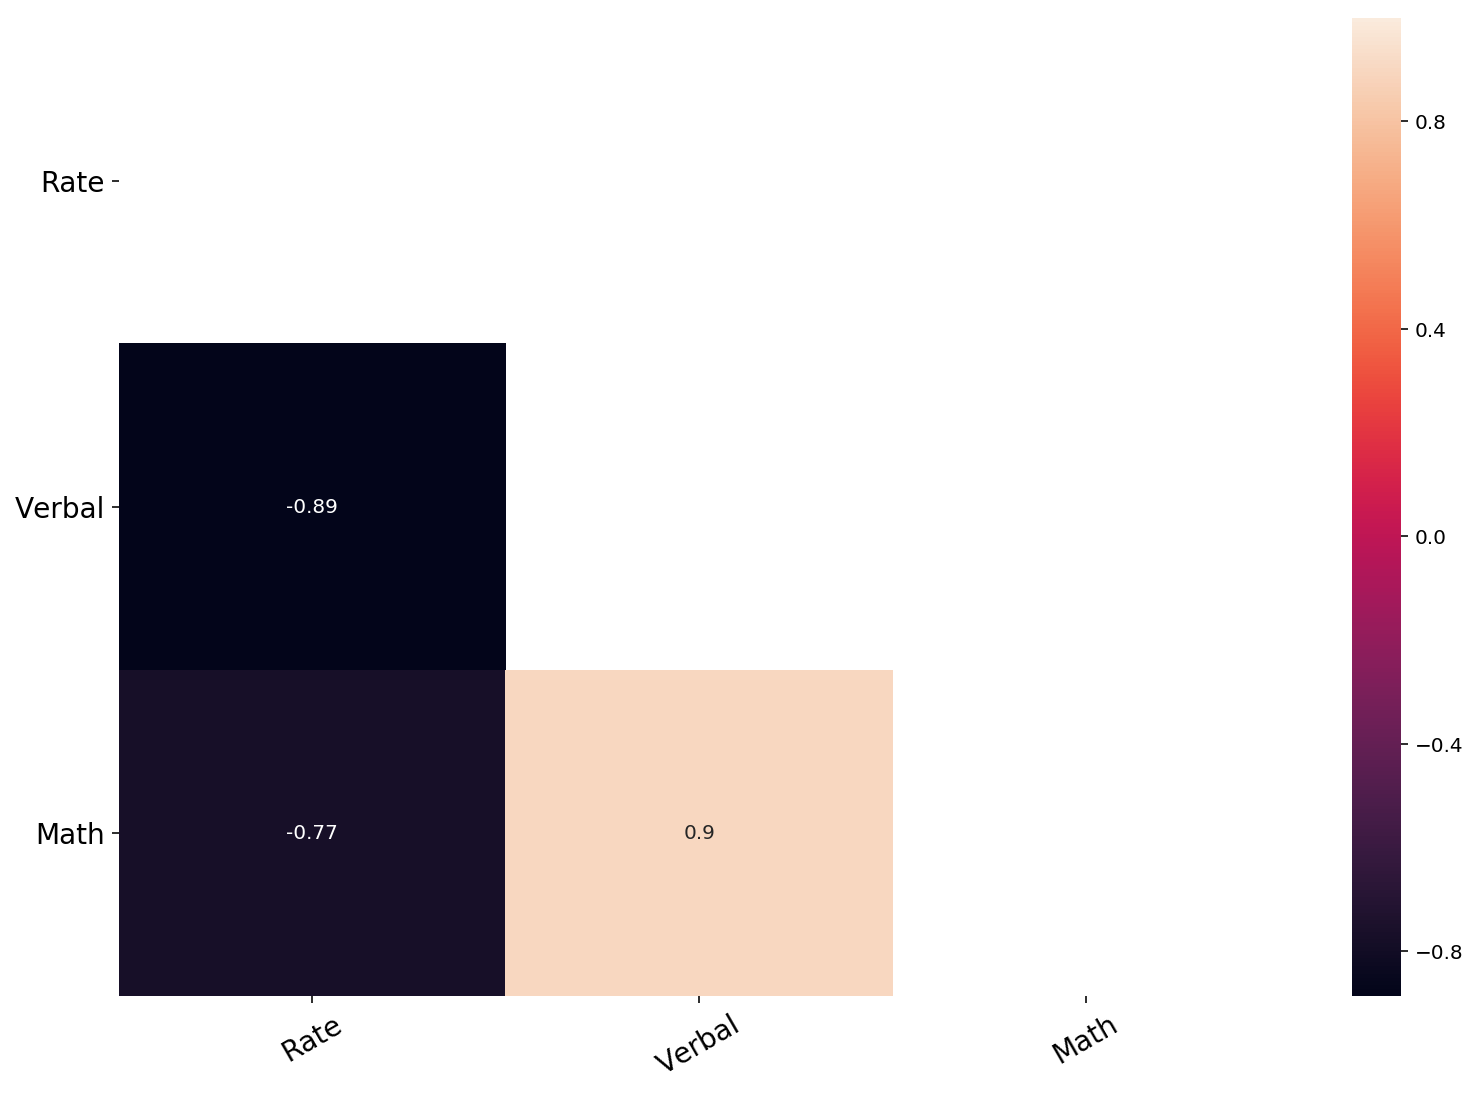

In [38]:
# i'll make a handy correlation matrix heatmap for my (reasonably) continuous measures:

import matplotlib.pyplot as plt
def correlation_heat_map(df):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(13,9))

    # Generate a mask for the upper triangle (taken from seaborn example gallery)
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with seaborn.
    # Assign the matplotlib axis the function returns. This will let us resize the labels.
    ax = sns.heatmap(corrs, mask=mask, annot=True)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()

continuous = ['Rate','Verbal','Math']
correlation_heat_map(data[continuous])

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [39]:
data[['Rate','Verbal','Math']].describe()

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000
